In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [22]:
dataset_train = pd.read_csv(r'C:\Users\RAVI\Desktop\test.csv')

In [23]:
dataset_train.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [29]:
train = dataset_train.loc[:, ['store_nbr']].values
train

array([[1],
       [1],
       [1],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

In [30]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [0.1509434],
       [0.1509434],
       [0.1509434]])

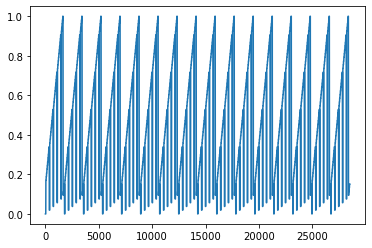

In [31]:
plt.plot(train_scaled)

In [32]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))

regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 39ms/step - loss: 0.5593
Epoch 2/100
38/38 [==============================] - 2s 42ms/step - loss: 0.3546
Epoch 3/100
38/38 [==============================] - 2s 41ms/step - loss: 0.2618
Epoch 4/100
38/38 [==============================] - 2s 41ms/step - loss: 0.1834
Epoch 5/100
38/38 [==============================] - 2s 41ms/step - loss: 0.1526
Epoch 6/100
38/38 [==============================] - 1s 37ms/step - loss: 0.1146
Epoch 7/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0969
Epoch 8/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0860
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0719
Epoch 10/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0670
Epoch 11/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0602
Epoch 12/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0552
Epoch 13/100
38/38 [=====

In [35]:
dataset_test = pd.read_csv(r'C:\Users\RAVI\Desktop\test.csv')
dataset_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [37]:
real_stock_price = dataset_test.loc[:, ['store_nbr']].values
real_stock_price

array([[1],
       [1],
       [1],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

In [38]:
dataset_total = pd.concat((dataset_train['store_nbr'], dataset_test['store_nbr']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.13207547],
       [0.13207547],
       [0.13207547],
       ...,
       [0.1509434 ],
       [0.1509434 ],
       [0.1509434 ]])

In [39]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Text(0, 0.5, 'Test Data Prediction')

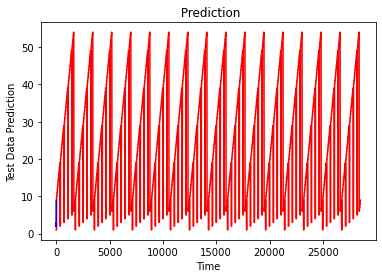

In [41]:
plt.plot(real_stock_price, color='red', label='X')
plt.plot(predicted_stock_price, color='blue', label='Y')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('Test Data Prediction')